In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [5]:
# Определяем функцию dy/dx = f(x, y)
def f(x, y):
    return y + x * np.exp(y)



In [6]:
# Метод Рунге-Кутта 4-го порядка

class RK_4:
    def __init__(self, f, x0, y0, h, x_end):
        self.x = np.arange(x0, x_end + h, h)
        self.n = len(self.x) - 1
        y = np.zeros(self.n + 1)
        y[0] = y0
        self.y = y
        self.f = f
        self.h = h
    
    def solve(self) -> tuple[np.ndarray, np.ndarray]:
        for i in range(self.n):
            k1 = self.h * self.f(self.x[i], self.y[i])
            k2 = self.h * self.f(self.x[i] + self.h/2, self.y[i] + k1/2)
            k3 = self.h * self.f(self.x[i] + self.h/2, self.y[i] + k2/2)
            k4 = self.h * self.f(self.x[i] + self.h, self.y[i] + k3)
            
            self.y[i+1] = self.y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
        
        return self.x, self.y

In [7]:
# Начальные условия
x0 = 0
y0 = 1
h = 0.0001
x_end = 1.0

In [8]:
# Решение
x, y = RK_4(f, x0, y0, h, x_end).solve()

C:\Users\user\AppData\Local\Temp\ipykernel_7608\596427194.py:3: RuntimeWarning: overflow encountered in exp
  return y + x * np.exp(y)


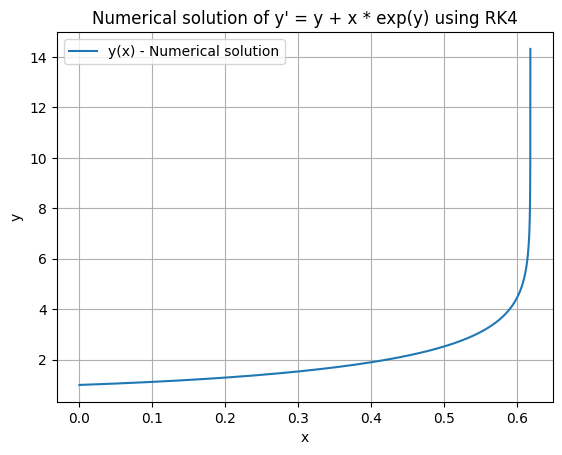

In [9]:
# График
plt.plot(x, y, label='y(x) - Numerical solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Numerical solution of y\' = y + x * exp(y) using RK4')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Начальные условия
x0 = 0
y0 = 1
x_end = 1.0

In [11]:
# Решаем через scipy
sol = solve_ivp(f, [x0, x_end], [y0], method='RK45', t_eval=np.linspace(x0, x_end, 100))

C:\Users\user\AppData\Local\Temp\ipykernel_7608\596427194.py:3: RuntimeWarning: overflow encountered in exp
  return y + x * np.exp(y)


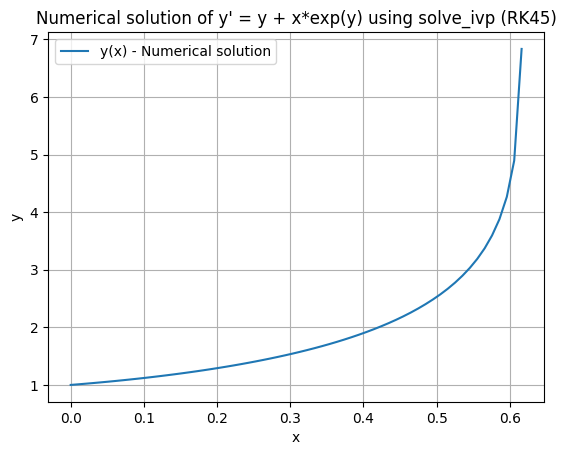

In [12]:
# График
plt.plot(sol.t, sol.y[0], label="y(x) - Numerical solution")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Numerical solution of y' = y + x*exp(y) using solve_ivp (RK45)")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Аналитическое решение
def f(x):
    return (1 / 2* x ** 2) + (1 / 6 * x ** 3) + (1 / 6 * x ** 4)

In [18]:
#Начальные условия
x0 = 0
y0 = 1
x_end = 1.0
n = 10 ** 7

In [19]:
# Вычисляем точки
from tqdm import tqdm

x = np.arange(x0, x_end, x_end / n)
y = []
for i in tqdm(range(n)):
    y.append(f(x[i]))

100%|██████████| 10000000/10000000 [00:07<00:00, 1334898.56it/s]


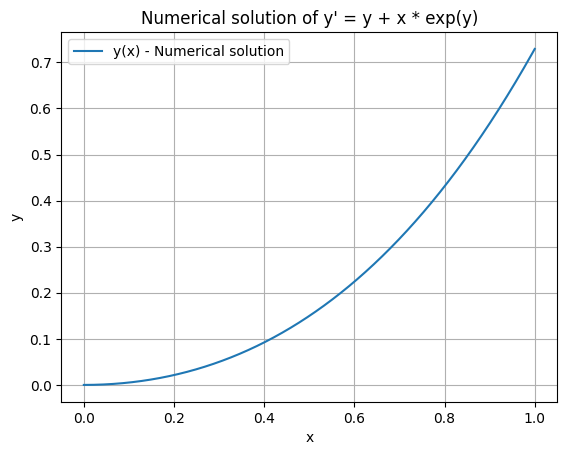

In [16]:
# График
plt.plot(x, y, label="y(x) - Numerical solution")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Numerical solution of y' = y + x * exp(y)")
plt.legend()
plt.grid(True)
plt.show()